In [1]:
#Importing some neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading global-power-plant-database.csv file
data = pd.read_csv('database_IND.csv')
# Looking for first five rows
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [3]:
#Looking for  max rows
pd.set_option('display.max.rows',None)

In [4]:
# Check Column name:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
# Checking  total number columns and rows
data.shape

(908, 25)

In [6]:
#we see that dataset as 908 rows and 25 columns

In [7]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [8]:
# Checking again total number columns and rows
data.shape

(908, 25)

In [9]:
# There is no duplicate value in our dataset

In [10]:
#Checking the datatype of each attribute
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [11]:
# Identifing the type of Problem- Output: primary_fuel is Classification data so we use Classification models

In [12]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [13]:
# we see that other_fuel3,wepp_id,estimated_generation_gwh  has no value so we removed it

In [14]:
# Removing those attribute which has no value
data.drop(['other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace = True)

In [15]:
# Checking missing values of each attributes
data.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [16]:
# we see that most of attribute has missing values

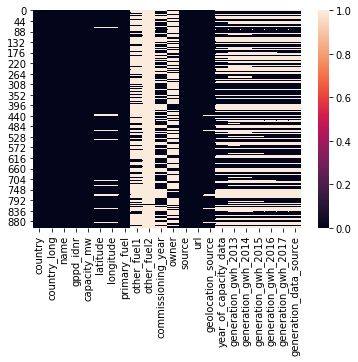

In [17]:
#Looking for null values if any, in heatmap
sns.heatmap(data.isna())
plt.show()

In [18]:
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

In [19]:
# we see that latitude has null value so we  filled by average of latitude

In [20]:
data['latitude'].fillna(data['latitude'].mean(),inplace=True)

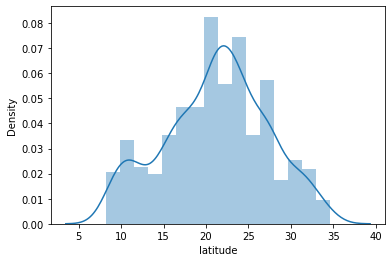

In [21]:
sns.distplot(data['latitude'])
plt.show()

In [22]:
data['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

In [23]:
# we see that longitude has null value so we  filled by average of longitude

In [24]:
data['longitude'].fillna(data['longitude'].mean(),inplace=True)

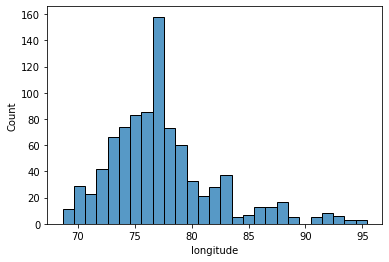

In [25]:
sns.histplot(data['longitude'])
plt.show()

In [26]:
data['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [27]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)

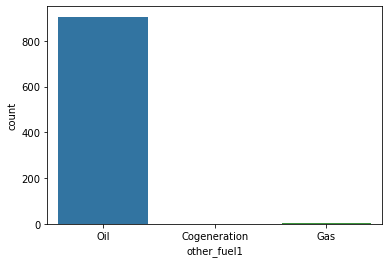

In [28]:
sns.countplot(data['other_fuel1'])
plt.show()

In [29]:
# we see that oil is larges consumption compare than other fuel

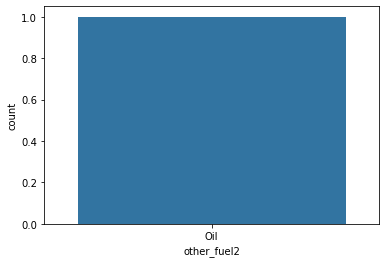

In [30]:
sns.countplot(data['other_fuel2'])
plt.show()

In [31]:
data['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [32]:
# we see that 'other_fuel2' has only one variable and which has already in 'other_fuel1" and it has 906 null value so we will drop it

In [33]:
data.drop(['other_fuel2'], axis = 1, inplace = True)

In [34]:
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [35]:
data['commissioning_year'].fillna(data['commissioning_year'].mode()[0],inplace=True)

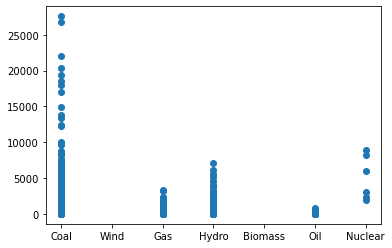

In [36]:
plt.scatter(data['primary_fuel'],data['generation_gwh_2013'])
plt.show()

In [37]:
#we see that in generation_gwh_2013 coal is more use to generation

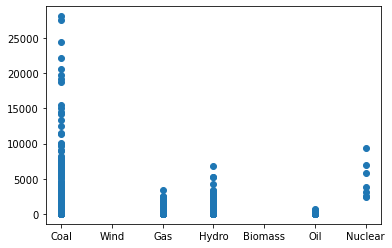

In [38]:
plt.scatter(data['primary_fuel'],data['generation_gwh_2014'])
plt.show()

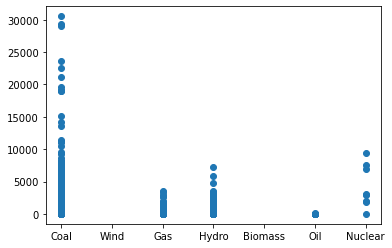

In [39]:
plt.scatter(data['primary_fuel'],data['generation_gwh_2015'])
plt.show()

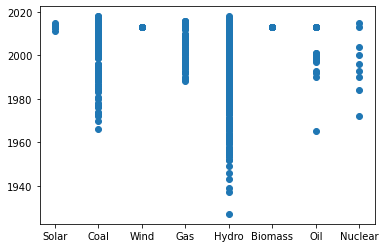

In [40]:
plt.scatter(data['primary_fuel'],data['commissioning_year'])
plt.show()

In [41]:
#For all above graph we see that coal and hydro is majorly used fuel for power geneartion

In [42]:
data['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [43]:
data['owner'].fillna(data['owner'].mode()[0],inplace=True)

In [44]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [45]:
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)

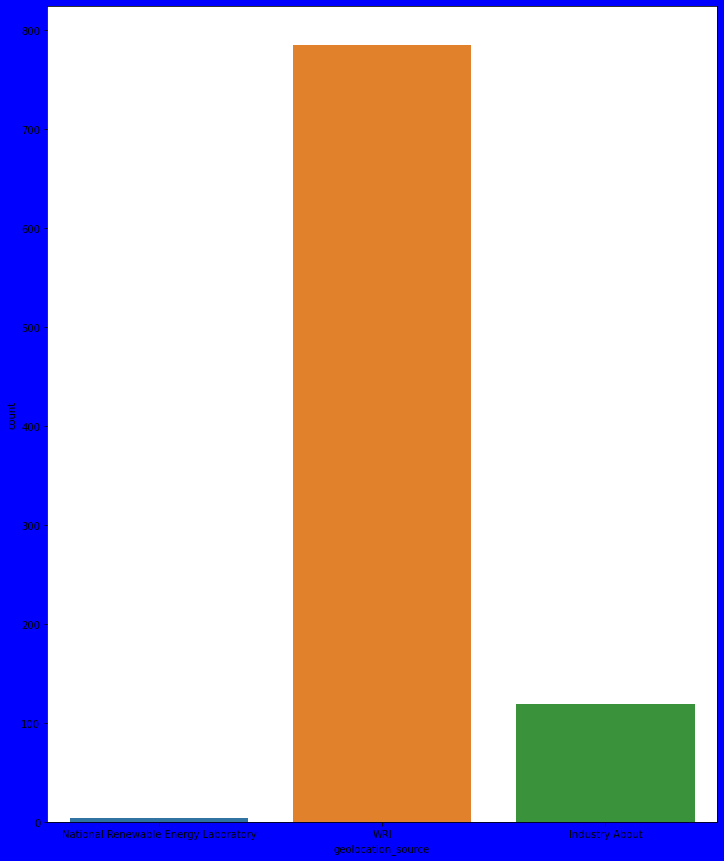

In [46]:
plt.figure(figsize=(12,15), facecolor='blue')
sns.countplot(data['geolocation_source'])
plt.show()

In [47]:
#

In [48]:
data['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [49]:
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0],inplace=True)

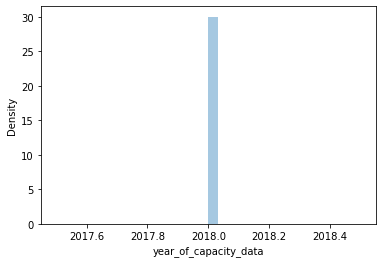

In [50]:
sns.distplot(data['year_of_capacity_data'])
plt.show()

In [51]:
data['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

In [52]:
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)

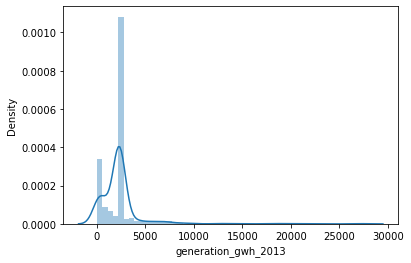

In [53]:
sns.distplot(data['generation_gwh_2013'])
plt.show()

In [54]:
data['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 5.73274000e+02,
       2.93600000e+03, 2.92521045e+03, 7.92686650e+02, 7.23528100e+03,
       1.33253385e+03, 9.46141000e+02, 1.07595320e+03, 8.56595500e+01,
       1.20444750e+02, 2.65780000e+02, 3.04832800e+02, 4.95967700e+02,
       1.22100000e+03, 5.05760000e+02, 1.25573200e+03, 2.85387000e+00,
       1.24631710e+03, 2.93534950e+02, 5.44576300e+03, 5.03370500e+01,
       5.24180925e+03, 6.50730000e+01, 1.36872200e+02, 6.75605000e+01,
       2.96272000e+03, 8.32884650e+02, 9.07937500e+01, 2.99176600e+02,
       5.85507000e+03, 2.23699080e+03, 1.43887000e+03, 8.11580000e+00,
       1.45560000e+02, 5.37195000e+03, 2.34650850e+02, 3.30595670e+03,
       3.73919000e+02, 1.49121645e+03, 2.53904100e+03, 1.01567610e+03,
      

In [55]:
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)

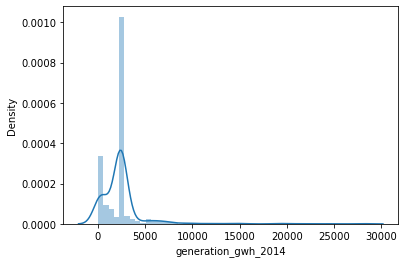

In [56]:
sns.distplot(data['generation_gwh_2014'])
plt.show()

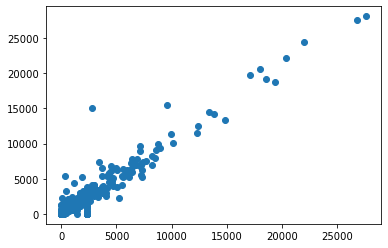

In [57]:
plt.scatter(data['generation_gwh_2013'],data['generation_gwh_2014'])
plt.show()

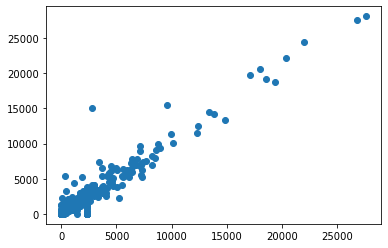

In [58]:
plt.scatter(data['generation_gwh_2013'],data['generation_gwh_2014'])
plt.show()

In [59]:
# we see that generation_gwh_2013 and generation_gwh_2014 has linear relationship

In [60]:
data['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       0.00000000e+00, 2.01300000e+03, 2.98513930e+03, 5.53220000e+01,
       7.41862050e+02, 5.97912500e+03, 1.43795470e+03, 6.18909900e+02,
       1.96760200e+02, 9.48831000e+02, 5.71607600e+02, 1.06942600e+02,
       3.96806000e+01, 2.31610720e+03, 2.31626436e+02, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [61]:
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)

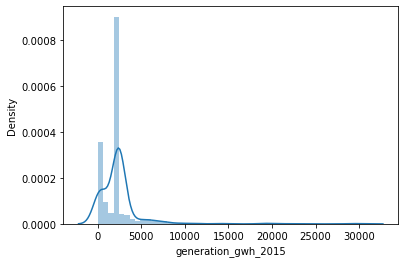

In [62]:
sns.distplot(data['generation_gwh_2015'])
plt.show()

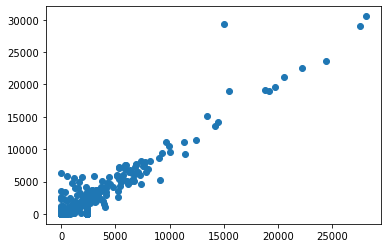

In [63]:
plt.scatter(data['generation_gwh_2014'],data['generation_gwh_2015'])
plt.show()

In [64]:
# we see this one is also linear relationship with each other

In [65]:
data['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       0.00000000e+00, 1.51100000e+03, 2.17363720e+03, 1.75018510e+03,
       6.65983350e+02, 6.34120200e+03, 2.80000000e+03, 9.96373100e+02,
       1.29033000e+03, 1.66863100e+03, 1.23282490e+03, 1.09181350e+02,
       5.32126000e+01, 6.77378800e+03, 1.87193669e+02, 1.20903640e+02,
       4.43242650e+02, 7.17700000e+03, 3.54900000e+02, 1.27499900e+03,
       1.04689800e+01, 1.33603625e+03, 2.96271200e+02, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [66]:
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)

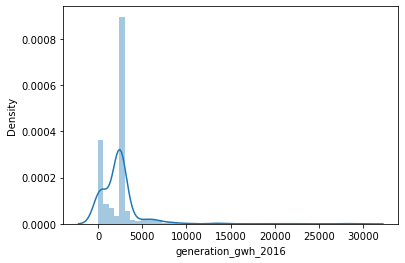

In [67]:
sns.distplot(data['generation_gwh_2016'])
plt.show()

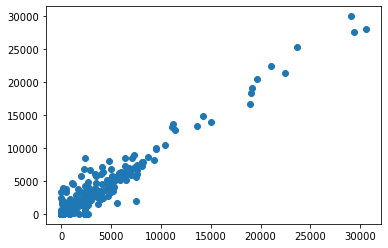

In [68]:
plt.scatter(data['generation_gwh_2015'],data['generation_gwh_2016'])
plt.show()

In [69]:
data['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       0.00000000e+00, 1.39500000e+03, 2.49417645e+03, 1.81284025e+03,
       6.38521350e+02, 6.77925600e+03, 2.12068000e+03, 1.46980405e+03,
       2.01879000e+03, 1.71320100e+03, 5.42643150e+02, 5.58394000e+01,
       6.84560000e+01, 6.15376000e+03, 1.78106690e+02, 3.47098000e+01,
       1.58254750e+02, 8.77800000e+03, 1.71355000e+02, 1.43607200e+03,
       5.85771000e+00, 1.32996675e+03, 3.13594150e+02, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [70]:
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)

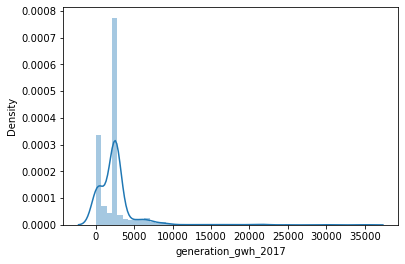

In [71]:
sns.distplot(data['generation_gwh_2017'])
plt.show()

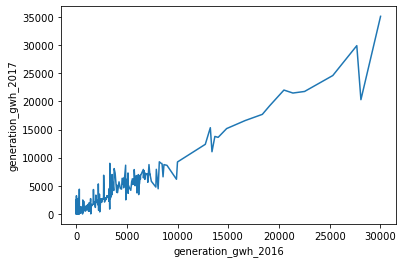

In [72]:
sns.lineplot(data['generation_gwh_2016'],data['generation_gwh_2017'])
plt.show()

In [73]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [74]:
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0],inplace=True)

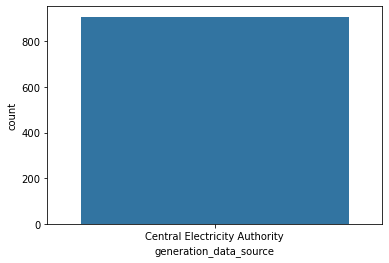

In [75]:
sns.countplot(data['generation_data_source'])
plt.show()

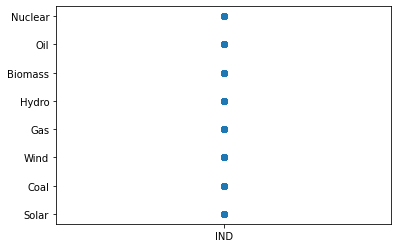

In [76]:
plt.scatter(x='country', y = 'primary_fuel', data=data)
plt.show()

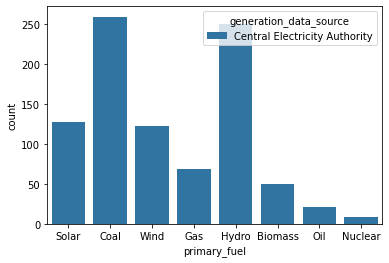

In [77]:
sns.countplot(hue='generation_data_source', x = 'primary_fuel', data=data)
plt.show()

In [78]:
# we observed  that 'url', 'gppd_idnr','country_long','generation_data_source' not  contribution for fuel

In [79]:
data.drop(['url', 'gppd_idnr','country_long','country','generation_data_source'], axis = 1, inplace = True)

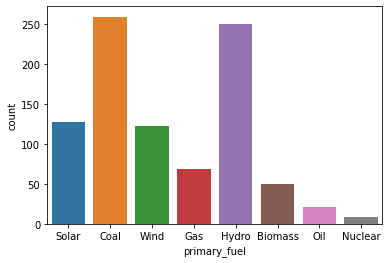

In [80]:
sns.countplot(data['primary_fuel'])
plt.show()

In [81]:
# we see that coal and hydro fuel has  more used to generate power

In [82]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [83]:
# we see that data is imbalance 

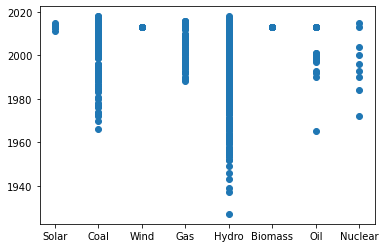

In [84]:
plt.scatter(y= 'commissioning_year',x = 'primary_fuel', data=data)
plt.show()

In [85]:
# we see early we use only hydro and coal fuel for generation of power but know a days we solar, wind and gas for power generation

In [86]:
#Filter categorical features
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features=data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data.columns:
    data["name"]=le.fit_transform(data["name"])
    data["primary_fuel"]=le.fit_transform(data["primary_fuel"])
    data["other_fuel1"]=le.fit_transform(data["other_fuel1"])
    data["owner"]=le.fit_transform(data["owner"])
    data["source"]=le.fit_transform(data["source"])
    data["geolocation_source"]=le.fit_transform(data["geolocation_source"])


In [88]:
data.head()

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0     0          2.5   28.1839    73.2407             6            2   
1     1         98.0   24.7663    74.6090             1            2   
2     2         39.2   21.9038    69.3732             7            2   
3     3        135.0   23.8712    91.3602             2            2   
4     4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  geolocation_source  \
0              2011.0    229     109                   1   
1              2013.0    258     174                   2   
2              2013.0      2      21                   2   
3              2004.0      5      22                   2   
4              2015.0      5      22                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0          2304.059202          2420.393316   
1                 2018.0          2304.059202          2420.393316   
2                 2018.0          2304.059202          2420.393316   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  
0          2414.072373          2453.936292          2531.754458  
1          2414.072373          2453.936292          2531.754458  
2          2414.072373          2453.936292          2531.754458  
3           843.747000           886.004428           663.774500  
4          5916.370000          6243.000000          5385.579736

In [89]:
#Checking Correlation
data.corr()

name  capacity_mw  latitude  longitude  \
name                   1.000000     0.059870 -0.133707   0.018649   
capacity_mw            0.059870     1.000000  0.049790   0.197124   
latitude              -0.133707     0.049790  1.000000   0.031501   
longitude              0.018649     0.197124  0.031501   1.000000   
primary_fuel           0.038752    -0.377783 -0.013453  -0.348710   
other_fuel1           -0.074643     0.002672  0.036606   0.030297   
commissioning_year    -0.040006     0.012518  0.034896  -0.145117   
owner                  0.098944    -0.310560 -0.070855  -0.300899   
source                -0.013801    -0.241701  0.055943  -0.239008   
geolocation_source     0.035528     0.204698 -0.183999   0.252415   
year_of_capacity_data       NaN          NaN       NaN        NaN   
generation_gwh_2013    0.082699     0.667842  0.036639   0.014021   
generation_gwh_2014    0.084915     0.705434  0.044085   0.011669   
generation_gwh_2015    0.075140     0.722081  0.036127   0.019176   
generation_gwh_2016    0.067800     0.752829  0.030932   0.039758   
generation_gwh_2017    0.075262     0.767040  0.030655   0.040407   

                       primary_fuel  other_fuel1  commissioning_year  \
name                       0.038752    -0.074643           -0.040006   
capacity_mw               -0.377783     0.002672            0.012518   
latitude                  -0.013453     0.036606            0.034896   
longitude                 -0.348710     0.030297           -0.145117   
primary_fuel               1.000000     0.004902            0.145487   
other_fuel1                0.004902     1.000000            0.054789   
commissioning_year         0.145487     0.054789            1.000000   
owner                      0.284055     0.033643            0.381615   
source                     0.053609     0.026557            0.301660   
geolocation_source        -0.482803    -0.021383           -0.242439   
year_of_capacity_data           NaN          NaN                 NaN   
generation_gwh_2013       -0.120512     0.025902            0.094530   
generation_gwh_2014       -0.125000     0.024258            0.114534   
generation_gwh_2015       -0.125138     0.026499            0.127325   
generation_gwh_2016       -0.131358     0.031284            0.147275   
generation_gwh_2017       -0.132174     0.020871            0.147874   

                              owner        source  geolocation_source  \
name                   9.894351e-02 -1.380057e-02        3.552806e-02   
capacity_mw           -3.105601e-01 -2.417009e-01        2.046977e-01   
latitude              -7.085504e-02  5.594280e-02       -1.839986e-01   
longitude             -3.008993e-01 -2.390075e-01        2.524152e-01   
primary_fuel           2.840550e-01  5.360860e-02       -4.828029e-01   
other_fuel1            3.364301e-02  2.655707e-02       -2.138286e-02   
commissioning_year     3.816148e-01  3.016596e-01       -2.424386e-01   
owner                  1.000000e+00  7.696524e-01       -3.849925e-01   
source                 7.696524e-01  1.000000e+00       -5.058227e-01   
geolocation_source    -3.849925e-01 -5.058227e-01        1.000000e+00   
year_of_capacity_data           NaN           NaN                 NaN   
generation_gwh_2013    1.159716e-16  1.148485e-16       -4.314899e-17   
generation_gwh_2014    3.452904e-17  1.129442e-17       -1.111170e-16   
generation_gwh_2015    2.535297e-17  3.266585e-17       -1.004804e-17   
generation_gwh_2016   -1.496135e-17  2.296820e-17        1.807415e-16   
generation_gwh_2017   -1.563929e-16 -1.191072e-16        9.412254e-17   

                       year_of_capacity_data  generation_gwh_2013  \
name                                     NaN         8.269905e-02   
capacity_mw                              NaN         6.678419e-01   
latitude                                 NaN         3.663949e-02   
longitude                                NaN         1.402097e-02   
primary_fuel                             

In [90]:
# we can understanding properly as we use heatmap to find correleation

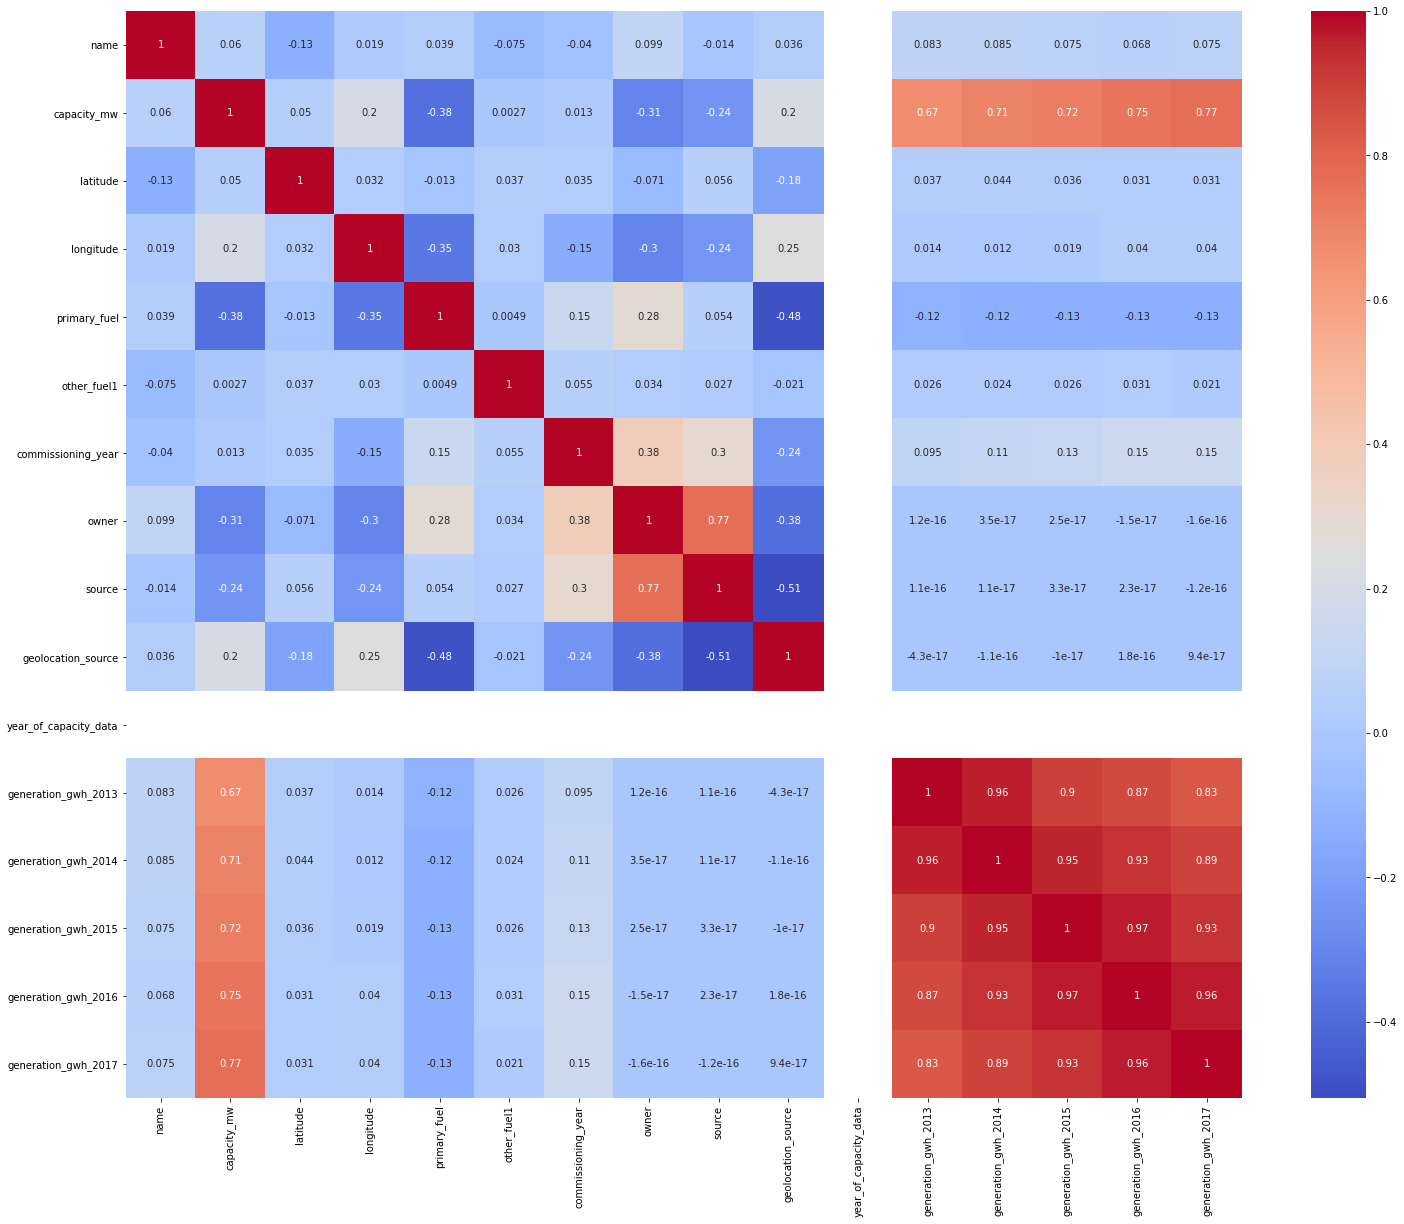

In [91]:
#Checking of correlation of features with each other
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

In [92]:
#generation_gwth_2013,2014,2015,2016,2017  correlated with each other
# capacity_mw  and generation_gwth_2013,2014,2015,2016,2017  correlated with each other

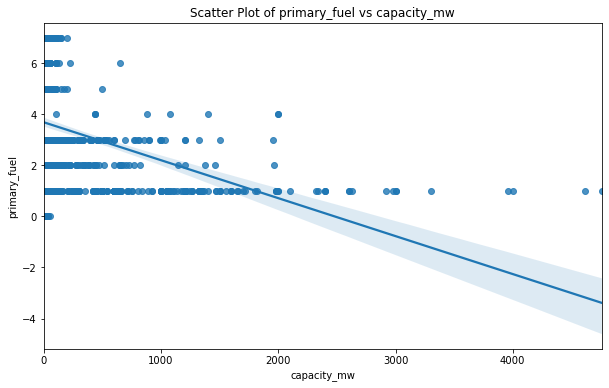

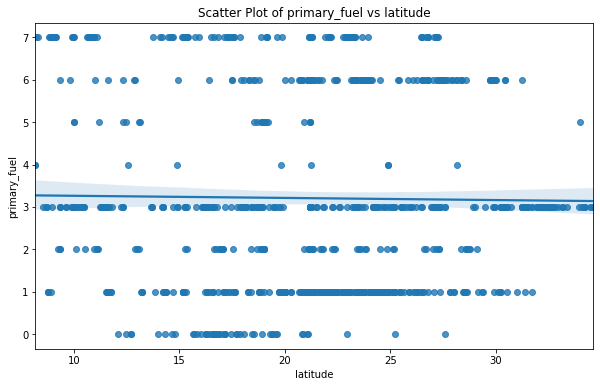

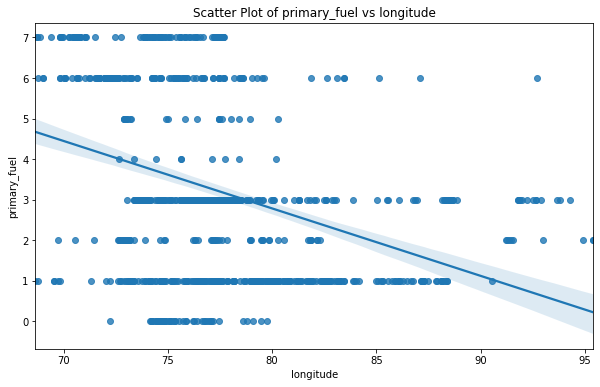

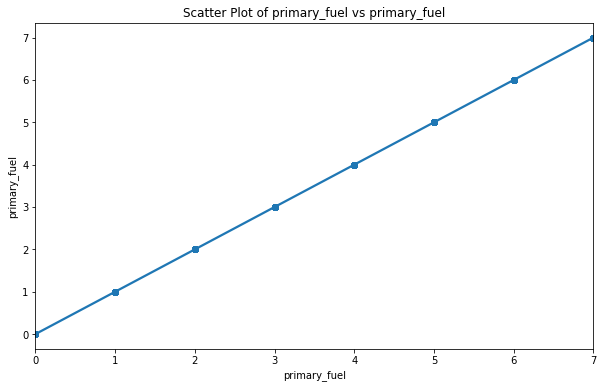

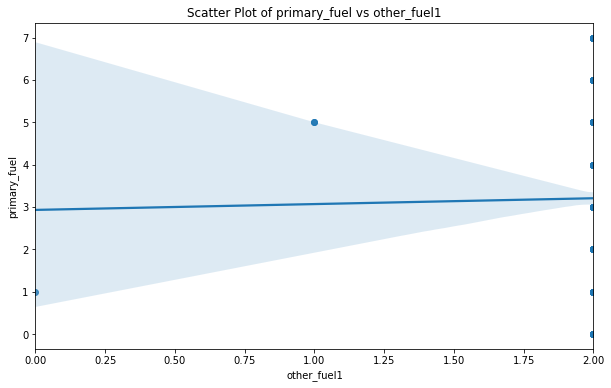

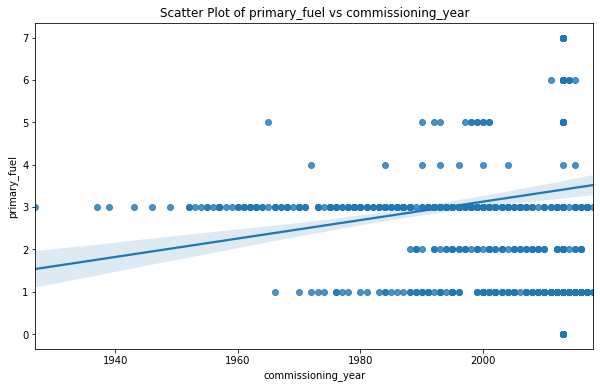

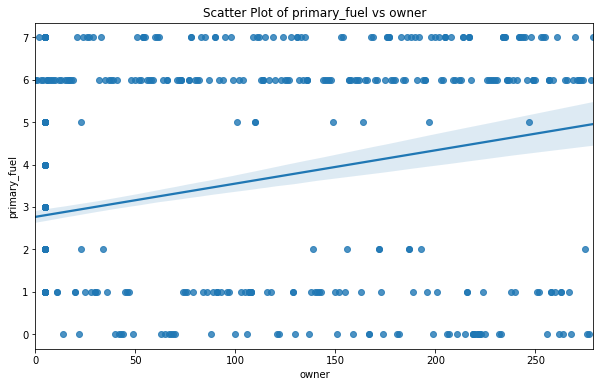

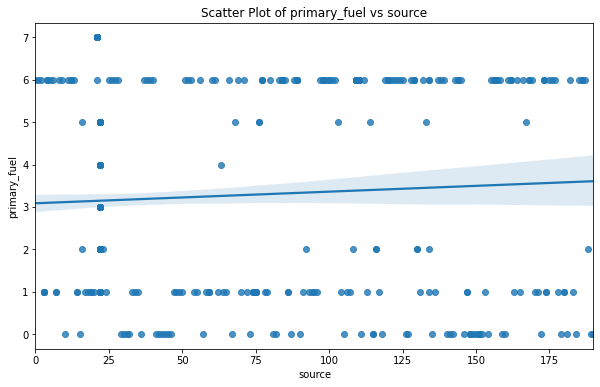

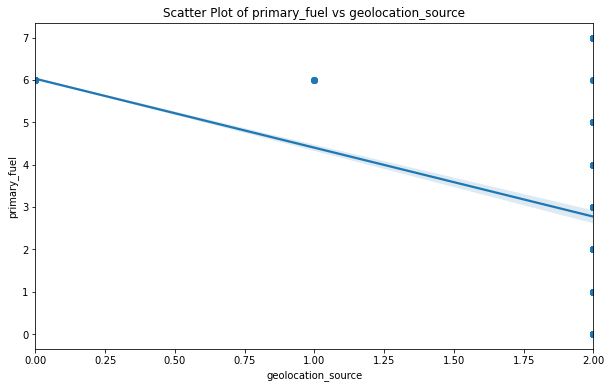

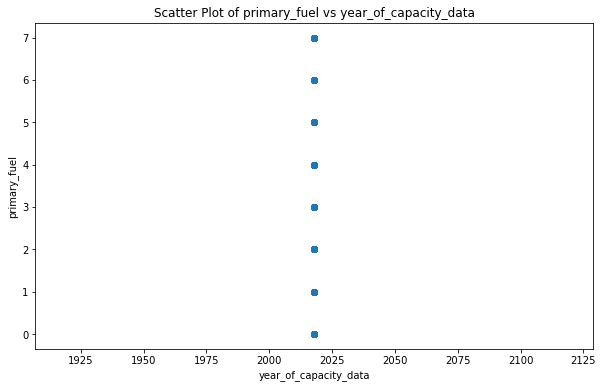

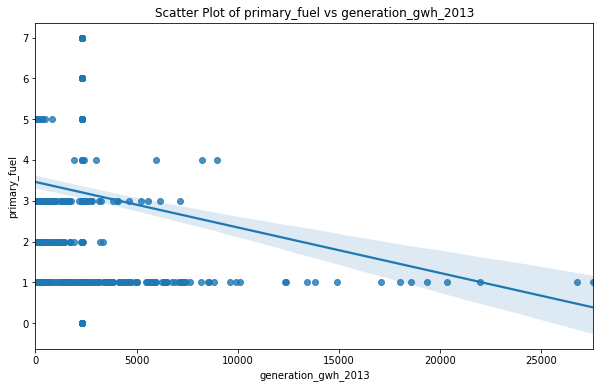

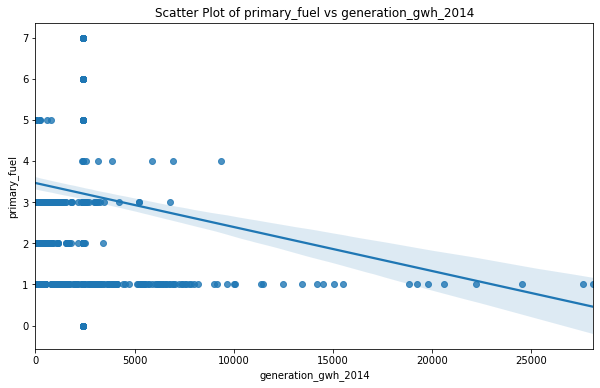

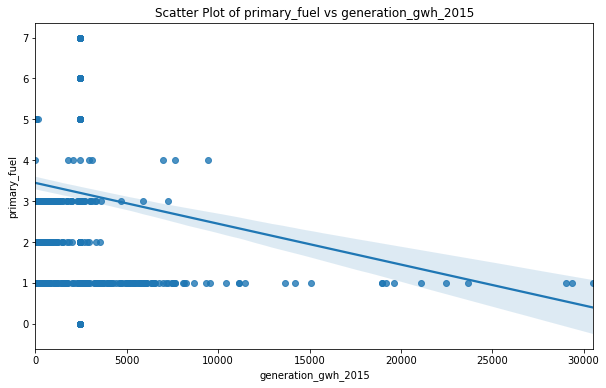

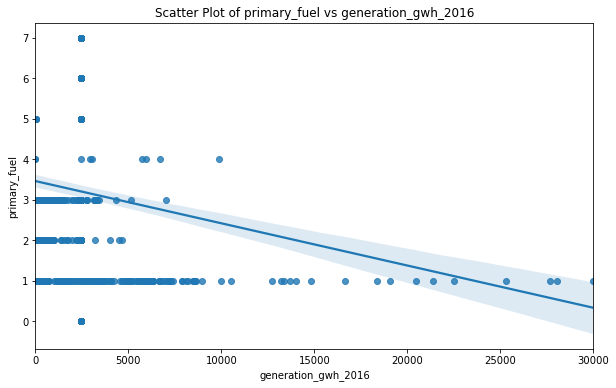

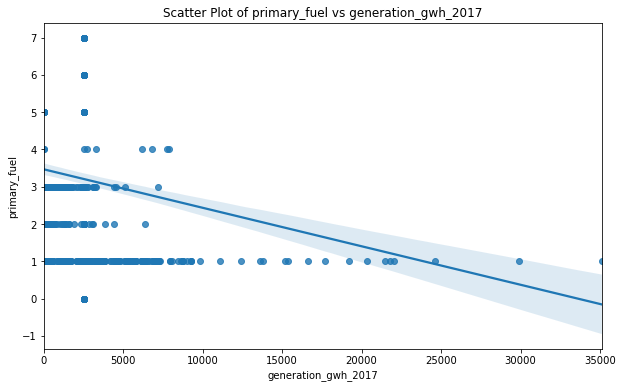

In [93]:
# Let's checking feature vs label relationship
collist=data.columns.values
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(data[collist[i]], data['primary_fuel'])
    plt.title('Scatter Plot of primary_fuel vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('primary_fuel')
    plt.show()

In [94]:
#primary_fuel with capacity_mw,longitud, geolocation_source, generation_gwh has negative relationship
#primary_fuel with commissioning_year,owner has positive  relationship

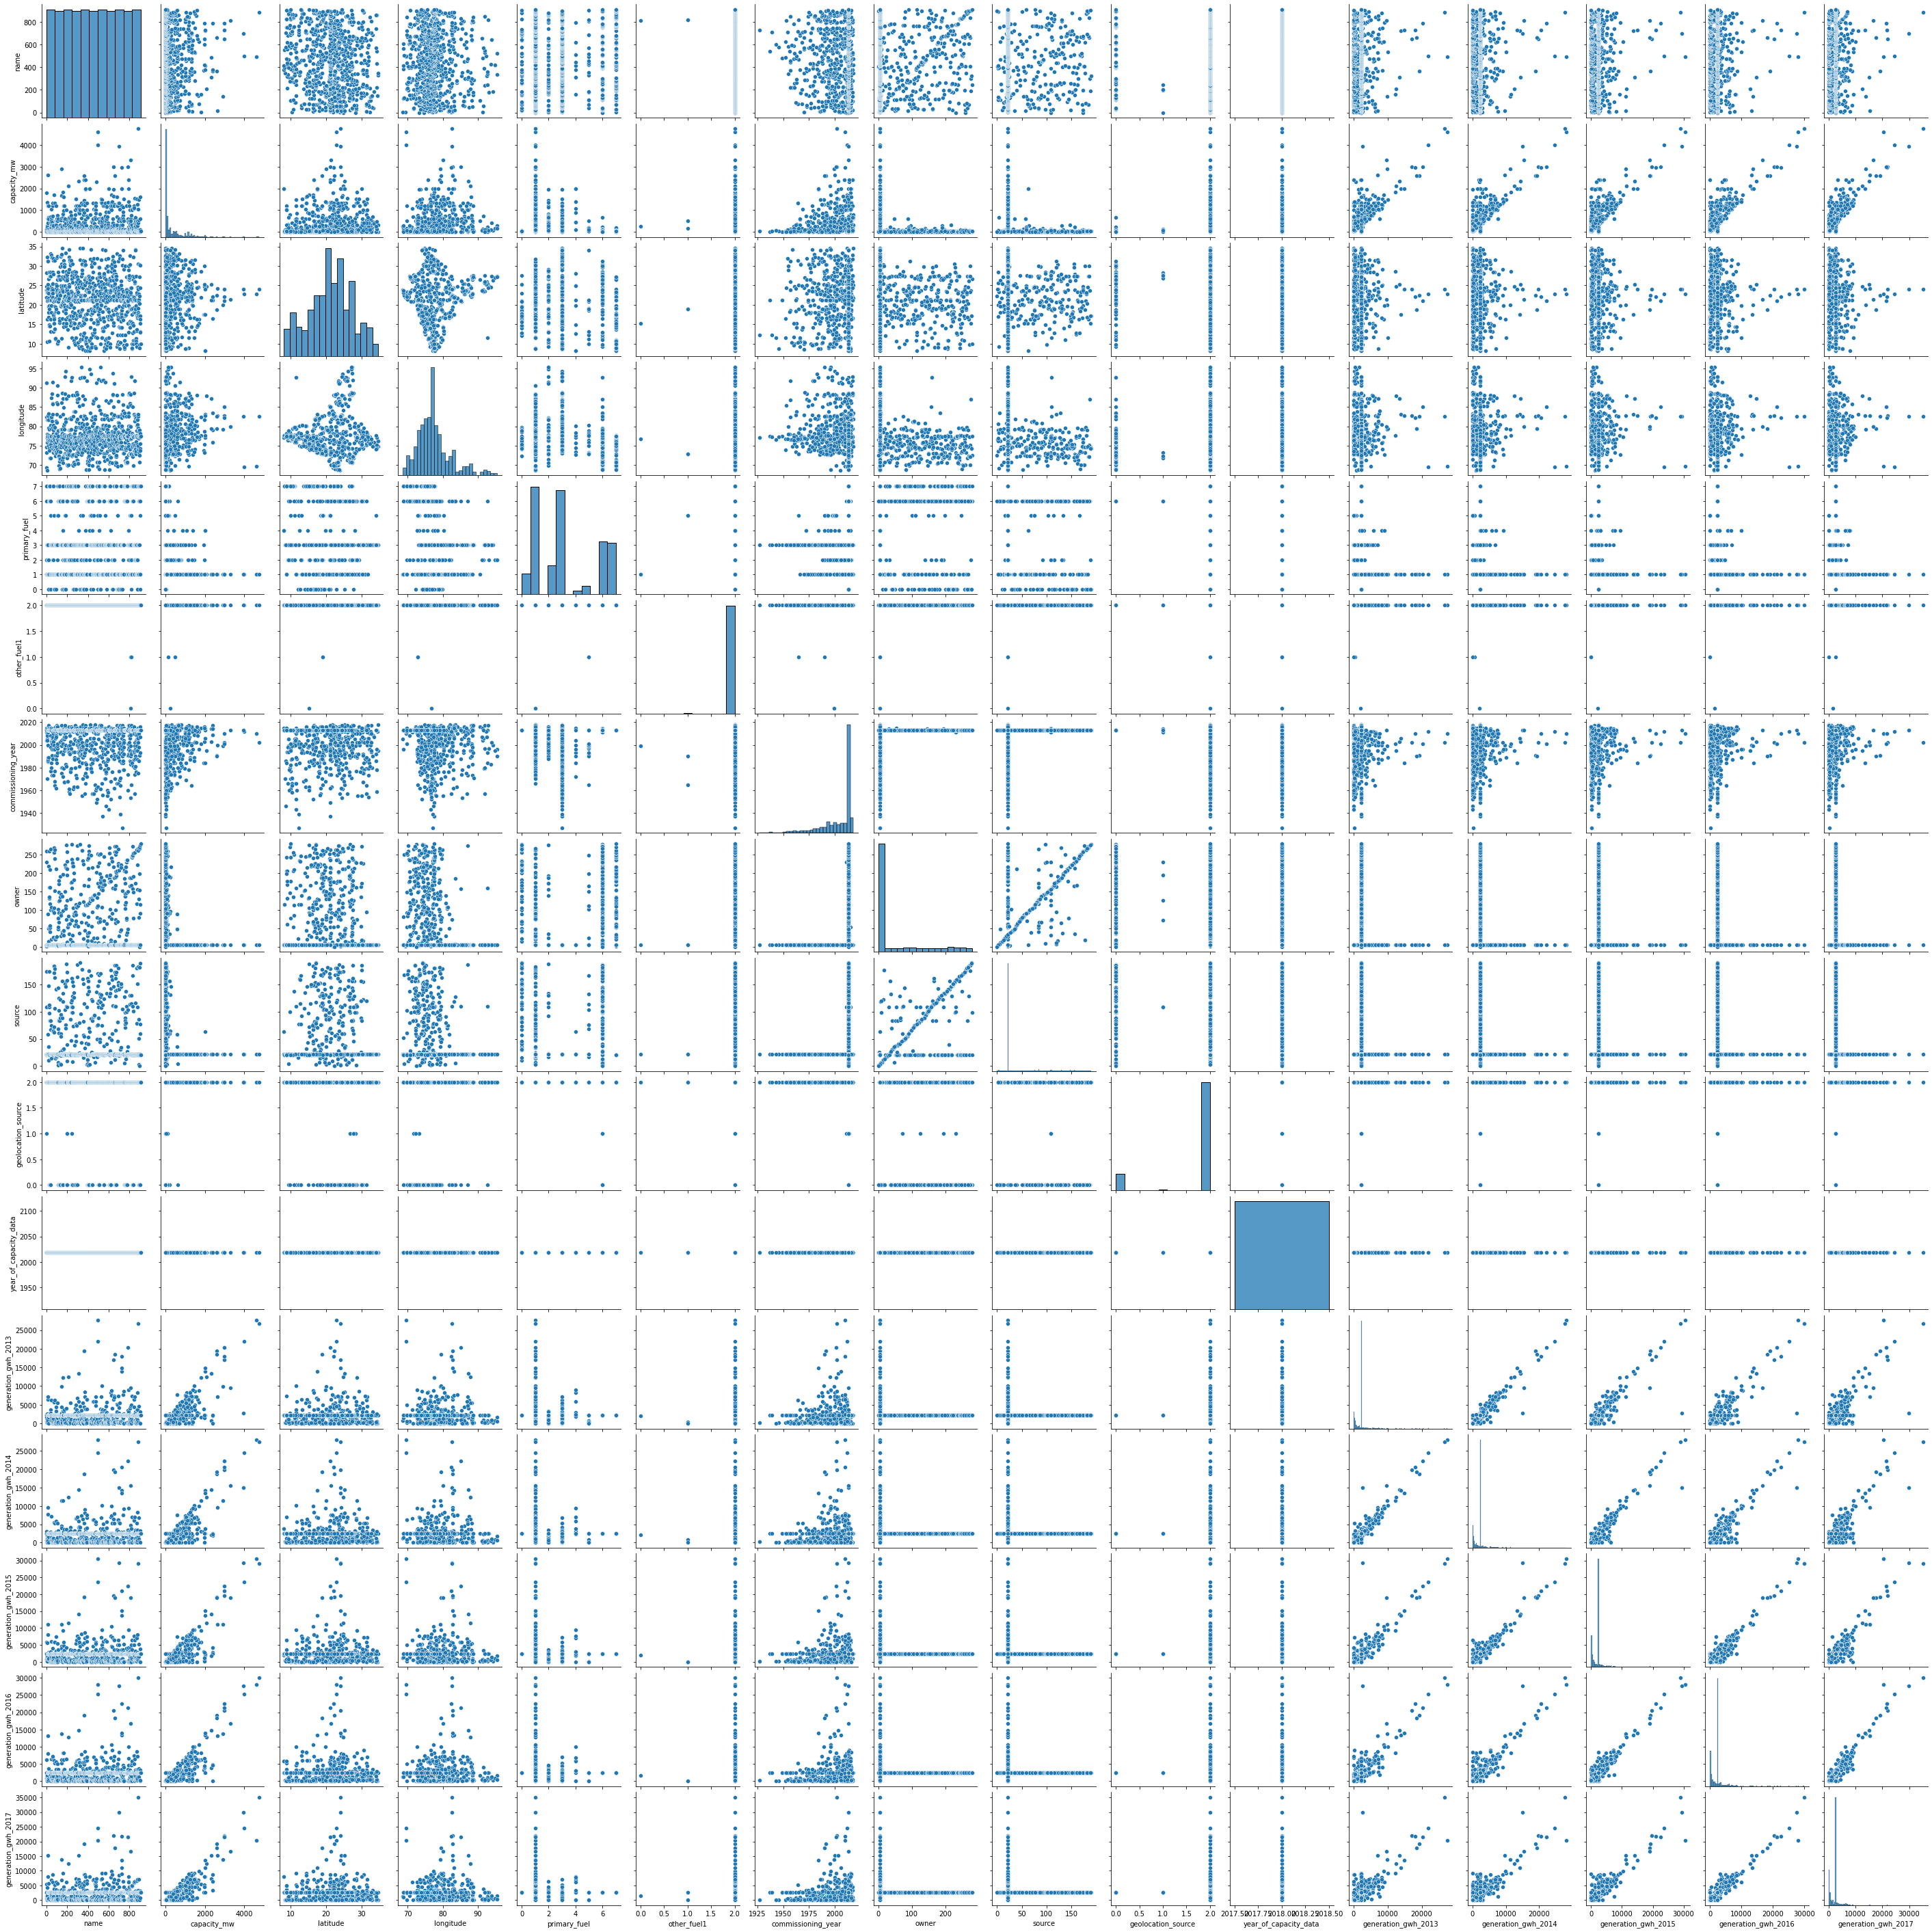

In [95]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

In [96]:
#In pairplot we cannot understand properly

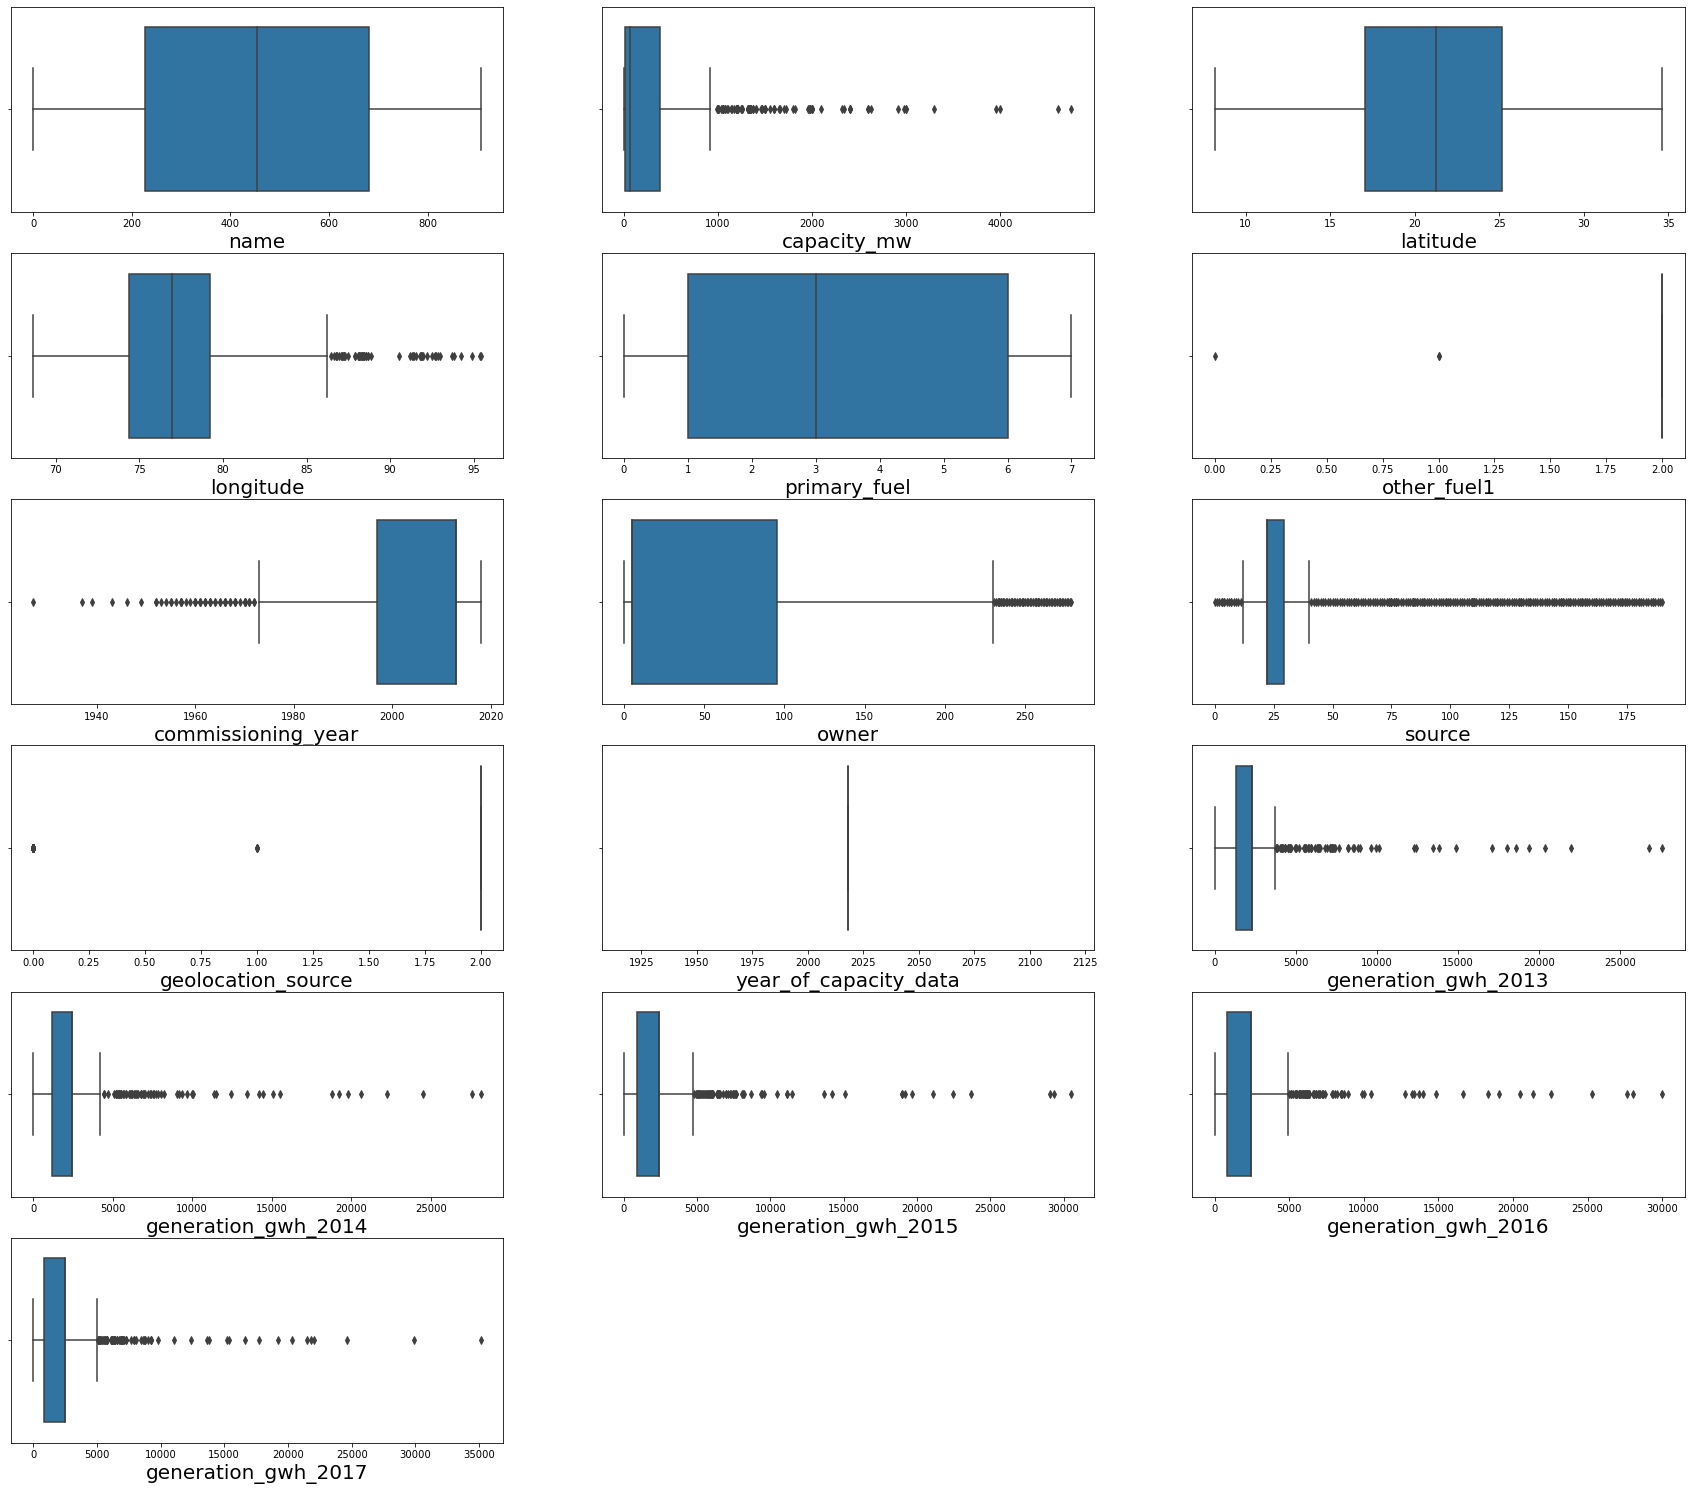

In [97]:
# let's see how data is skewness for every column
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [98]:
#we see that skweness are present in dataset

In [99]:
data.skew()

name                      0.000000
capacity_mw               3.193257
latitude                 -0.147391
longitude                 1.129836
primary_fuel              0.471141
other_fuel1             -20.464435
commissioning_year       -1.779021
owner                     1.366078
source                    1.829145
geolocation_source       -2.161710
year_of_capacity_data     0.000000
generation_gwh_2013       5.241491
generation_gwh_2014       5.041961
generation_gwh_2015       5.367370
generation_gwh_2016       5.071758
generation_gwh_2017       5.111938
dtype: float64

In [100]:
# we  accept the skewness between -.5 to +.5 and we ignore object dtype skweness

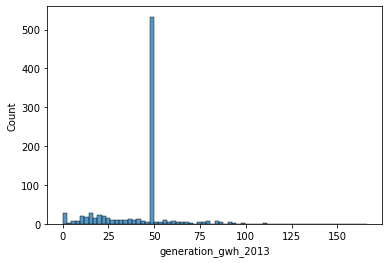

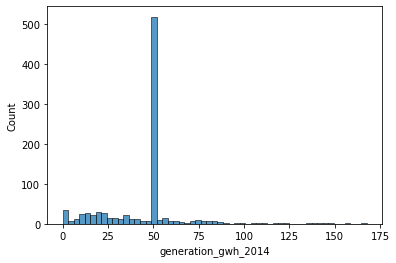

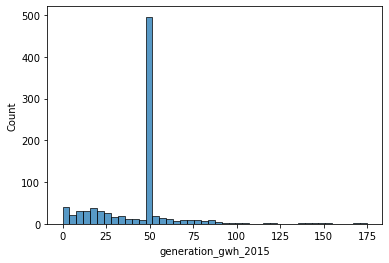

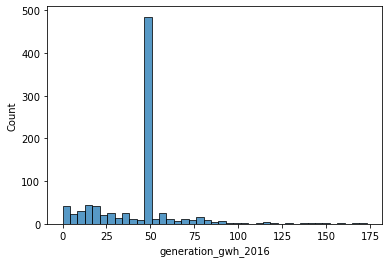

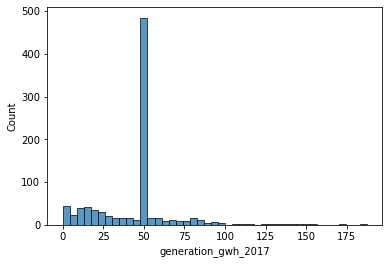

In [101]:
#Removing skewness
data['generation_gwh_2013'] =np.sqrt(data['generation_gwh_2013'])
sns.histplot(data['generation_gwh_2013'])
plt.show()
data['generation_gwh_2014'] =np.sqrt(data['generation_gwh_2014']) 
sns.histplot(data['generation_gwh_2014'])
plt.show()
data['generation_gwh_2015'] =np.sqrt(data['generation_gwh_2015'])
sns.histplot(data['generation_gwh_2015'])
plt.show()
data['generation_gwh_2016'] =np.sqrt(data['generation_gwh_2016'])
sns.histplot(data['generation_gwh_2016'])
plt.show()
data['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])
sns.histplot(data['generation_gwh_2017'])
plt.show()

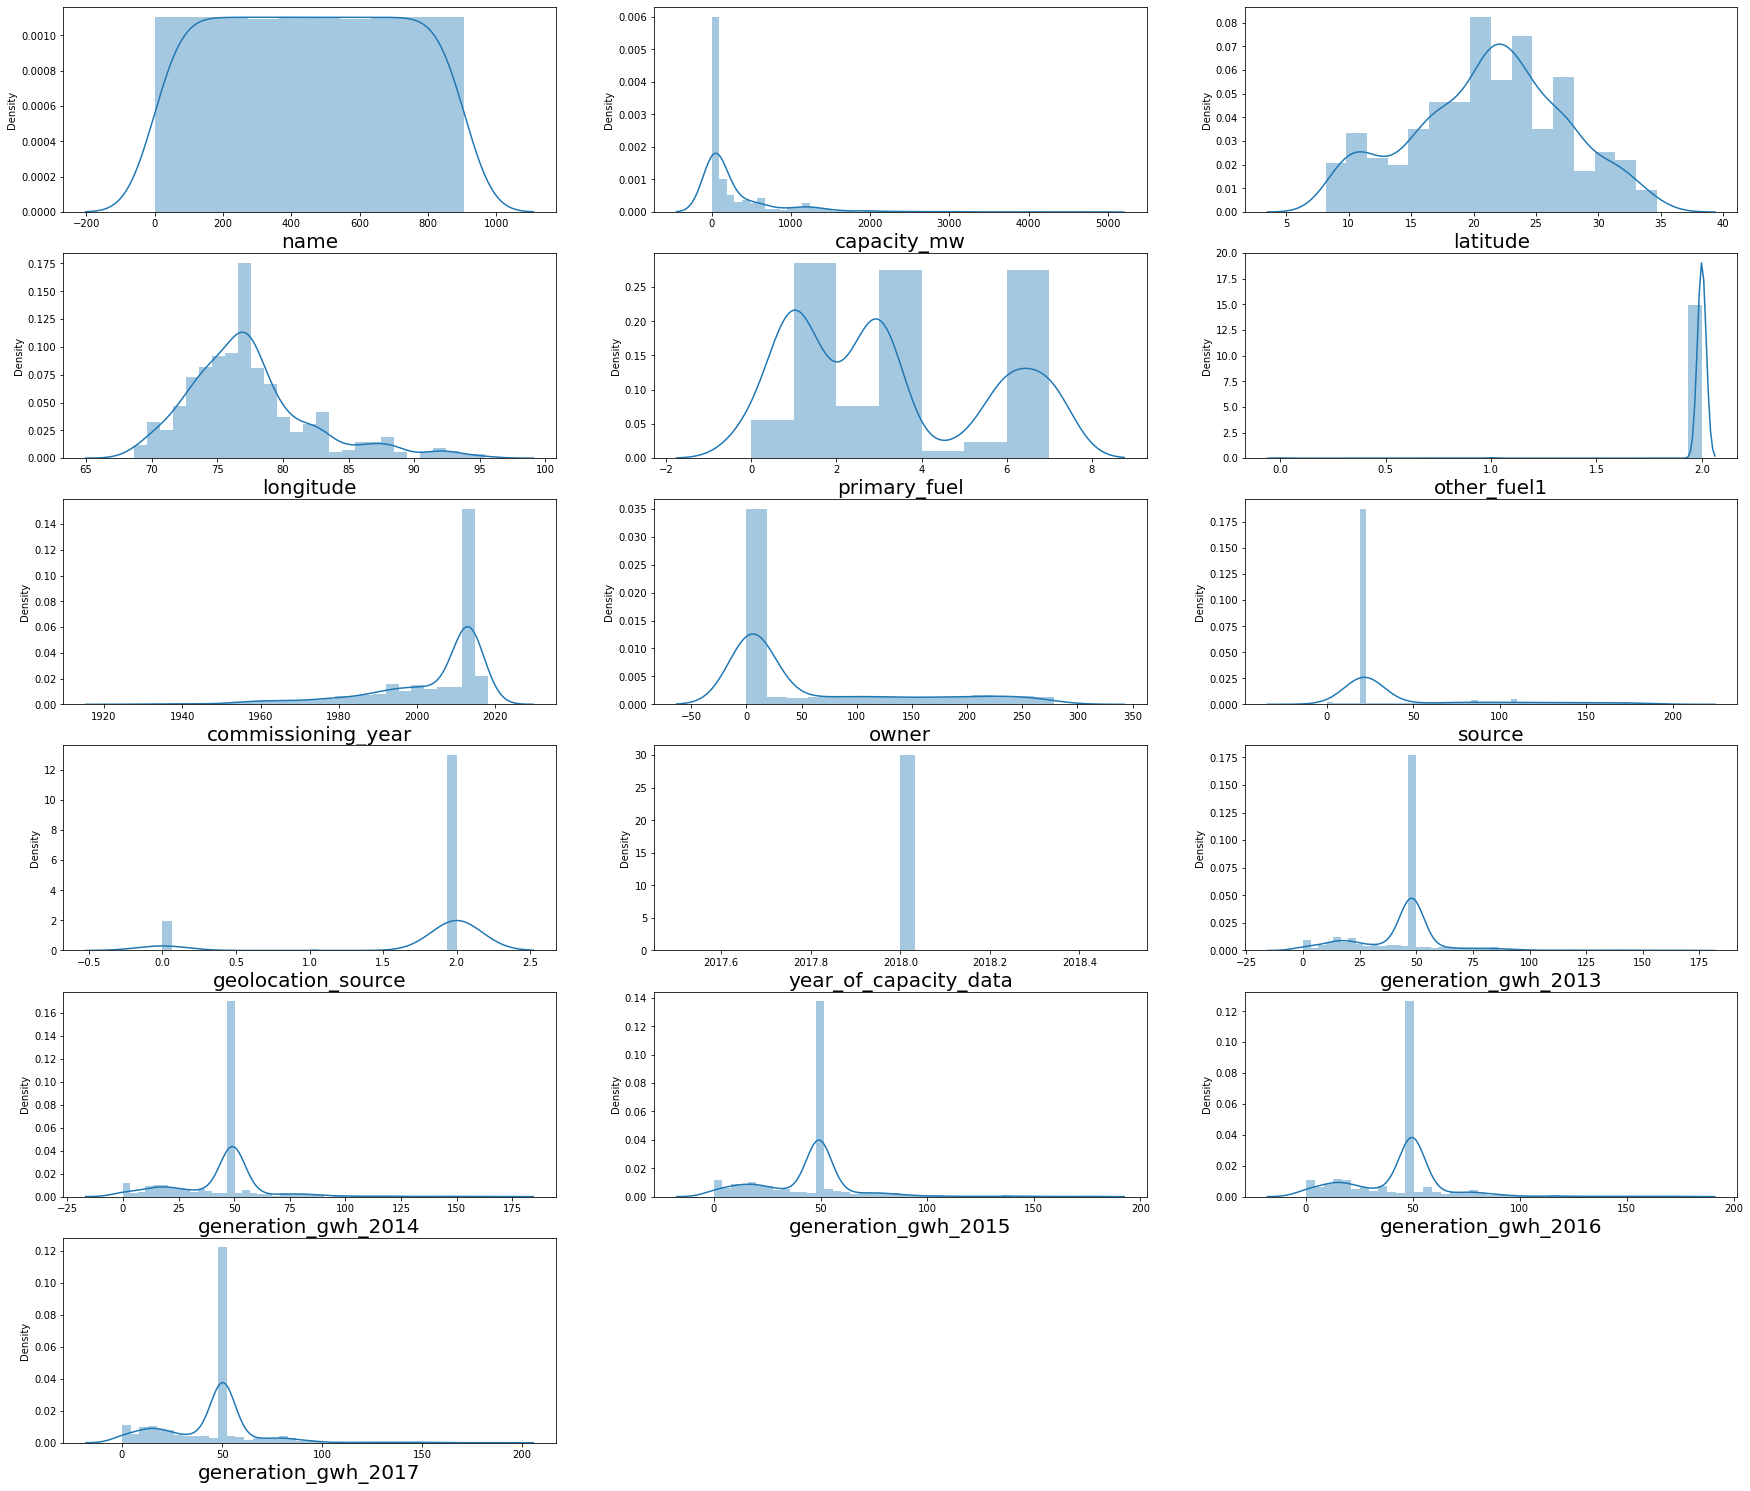

In [102]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [103]:
# we  accept the skewness between -.5 to +.5 and we ignore object dtype

In [104]:
# Now we split feature and label
x=data.drop("primary_fuel",axis=1)
y=data["primary_fuel"]

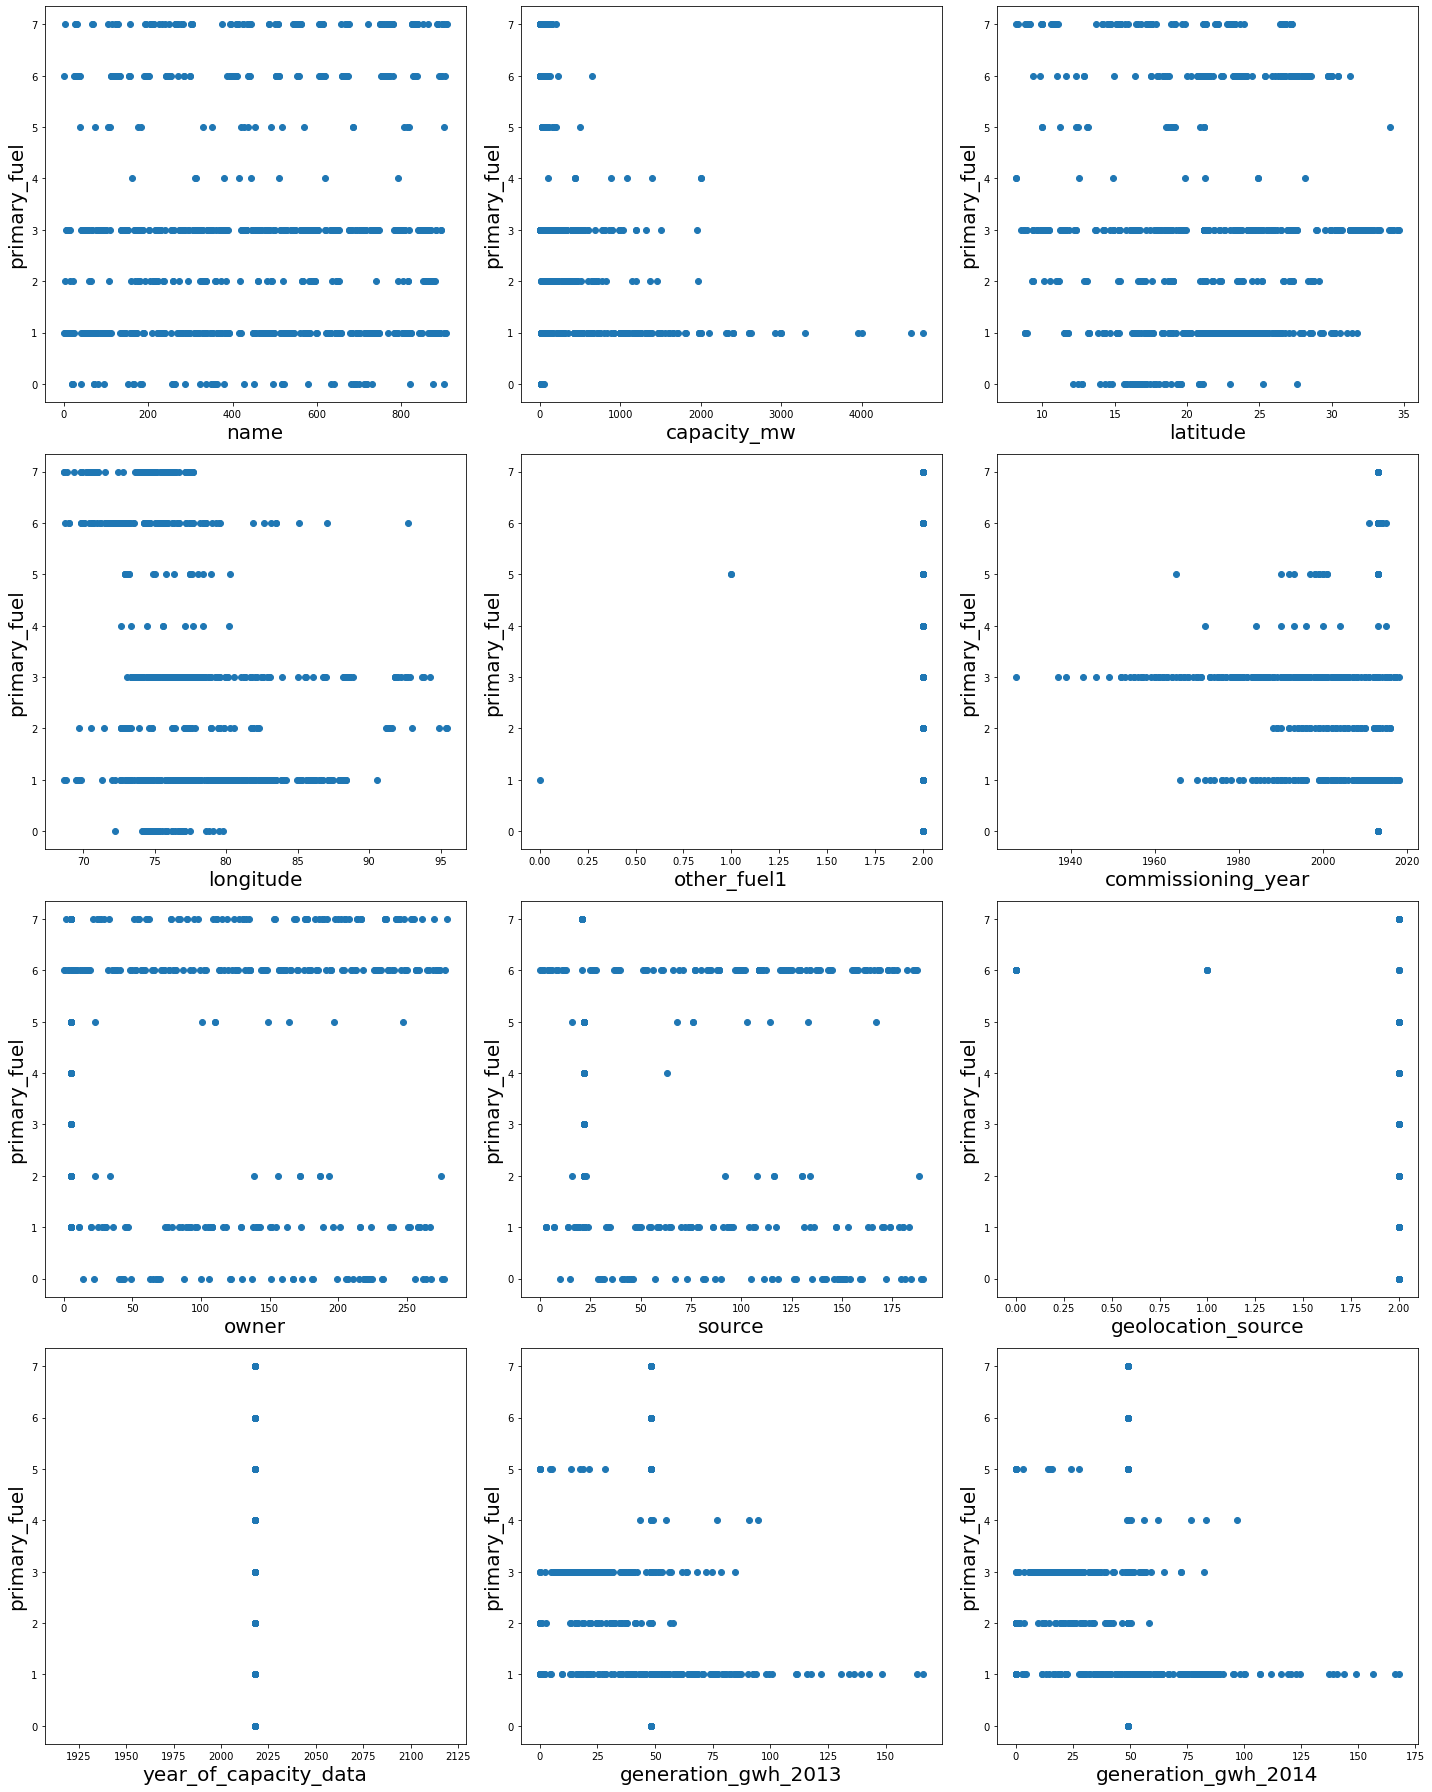

In [105]:
# Let' see relation between features and labels.
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('primary_fuel', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [106]:
# Now we deal with data imbalance

In [107]:
data['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [108]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler
ros  = RandomOverSampler()
X_new, y_new = ros.fit_resample(x,y)

In [109]:
print(y_new.value_counts())

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64


In [110]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(X_new)

In [111]:
from sklearn.decomposition import PCA
pca =PCA()
pca.fit_transform(X_score)

array([[ 1.02950091e+00, -2.64448701e+00, -1.38116174e+00, ...,
         4.24730106e-02,  4.91672982e-02, -4.23070784e-17],
       [ 1.14498539e+00, -2.80640860e+00, -8.19039615e-01, ...,
         3.71623654e-02,  3.86947784e-02, -2.00594440e-18],
       [ 4.00153581e-01,  4.21378142e-02, -1.00035262e+00, ...,
        -3.96821815e-02, -5.80220618e-05, -8.89212454e-18],
       ...,
       [ 4.11608122e-01,  6.86532648e-01,  1.32444277e+00, ...,
        -5.51584162e-02, -6.84129931e-02,  6.86220331e-19],
       [ 4.87720339e-01,  5.65543883e-01,  1.26261254e+00, ...,
        -6.50158816e-02, -6.79909279e-02,  1.03737882e-18],
       [ 6.12937457e-01, -3.59967900e-01, -2.62458163e-01, ...,
        -2.35073715e-02,  1.12676699e-02, -3.73281477e-19]])

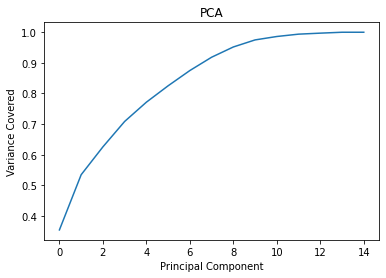

In [112]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title("PCA")
plt.show()

In [113]:
pca=PCA(n_components=10)
new_pcomp=pca.fit_transform(X_score)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
princi_comp

PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0      1.029501 -2.644487  -1.381162  0.818035 -0.753687  0.823703  0.496131   
1      1.144985 -2.806409  -0.819040 -0.451448 -0.713848  1.364957  1.524294   
2      0.400154  0.042138  -1.000353  0.248588 -2.327203 -0.236420 -0.208946   
3     -2.181692  1.028998  -2.349885 -0.741031  1.511691  1.895441  0.202935   
4      2.239323  2.200585  -1.653537 -0.667200 -0.161719  1.879247 -1.130817   
5     -1.102093  0.005037  -0.983533  0.557109 -2.327520 -0.334819 -0.235026   
6     -3.908613  0.899142  -0.262584 -0.654502 -1.280036  0.341571  1.107271   
7     -1.824650  0.075228  -2.137865  0.856913 -0.590767  0.394471 -0.211808   
8     -2.523218  0.307451  -0.831011 -0.738137 -1.358376  0.448410 -0.400247   
9     -0.448924  0.784292  -1.768302 -0.201419 -0.240914  0.960172  0.185003   
10     0.920504  1.441496  -1.291821 -0.491750 -0.925909  1.168826 -1.058194   
11    -2.217311  0.576812  -1.852481  1.411147 -0.671719  0.180501  0.950277   
12     4.072956  2.270176  -1.909826 -0.037158 -0.111978  1.627569  0.113628   
13    -0.101531  0.952195  -1.974361  1.469420 -0.472697  0.358150  1.391720   
14    -0.116120  1.028444  -1.221843  0.350579 -0.900394  0.437794  1.165238   
15     6.094899  3.885530  -1.682673  0.166234 -0.100581  2.250970 -0.194503   
16    -1.433270  0.905561  -1.464194  0.760537 -1.053020  0.298371  0.814737   
17     0.610517  0.196364  -1.537998 -0.577390 -0.027068  1.471546  0.171330   
18     1.291887  1.593896  -1.643651 -0.485245 -0.162251  1.532805 -0.837850   
19     0.361201 -0.006673  -0.980305 -0.666895 -1.190625  0.585660  0.090278   
20     0.273334  0.383218  -1.102033 -0.308783 -1.482996  0.243002 -0.162897   
21     0.957651 -2.235117  -0.322895 -1.233460 -0.998451  1.248976  1.164329   
22    -1.386047  1.230520  -1.744389  0.735294 -0.476693  0.664367  0.772322   
23    -2.890679  0.424681  -1.653831 -1.027981  0.180959  1.311173 -1.316857   
24     1.024608 -2.538790  -0.675824 -1.252417 -0.072017  1.822250  1.541540   
25     0.589582 -0.785988  -1.163970 -0.568097 -0.692354  1.080937  0.434491   
26     1.067667 -2.810899  -1.779300  1.460025 -0.358245  0.883497 -0.583734   
27     0.239119  0.474605  -0.821382 -0.962190 -1.347041  0.510577 -0.195945   
28     0.888149 -2.097223  -1.073667 -0.158803 -0.320130  1.302035 -0.954488   
29     0.345063  0.347788  -0.958408 -0.332703 -1.660494  0.211007 -0.230700   
30     0.422162 -0.205486  -0.339679 -1.672232 -1.194995  0.770005  0.174169   
31     0.239470  0.471638  -0.802445 -0.968388 -1.348724  0.498254 -0.198266   
32     0.851789 -1.925727  -1.801149  1.757214 -1.008439  0.353878 -1.186963   
33     0.869843 -1.991222  -1.779282  1.739054 -0.993192  0.363306 -1.151112   
34     0.879796 -2.026832  -1.766001  1.728937 -0.984002  0.367603 -1.131827   
35     0.975297 -2.378007  -1.654290  1.622385 -0.914399  0.427395 -0.938730   
36     1.046530 -2.639663  -1.569331  1.541398 -0.862398  0.471694 -0.795091   
37     1.124249 -2.925251  -1.477609  1.454148 -0.805512  0.520070 -0.638173   
38     1.214917 -3.258601  -1.371714  1.353415 -0.739197  0.576689 -0.454855   
39    -3.503669  0.533183  -0.798706 -1.129264 -0.759033  0.690238  0.068955   
40    -0.077666  1.681483  -1.631582  1.474838 -0.744503  0.400006  1.545980   
41     0.550706 -0.646933  -0.597885 -0.948043 -1.239604  0.692714  0.345855   
42     0.660792  0.661909  -2.035699  1.322114 -0.893721  0.263881  0.194405   
43    -0.608461  0.543931  -1.269887 -0.402097 -0.944251  0.665932 -0.533087   
44    -2.195202  0.703123  -1.831480  1.745677 -0.602546  0.055036  1.176392   
45     3.237594  2.497298  -2.029290 -0.140347  0.743872  1.912862  0.593349   
46     0.272659  0.790194  -1.297171 -0.377583 -0.938177  0.727859 -0.532520   
47    -1.433587  1.514792  -1.110294 -0.282731 -0.167796  1.008047  0.807239   
48     0.228835  0.588549  -1.311593 -0.551323 -0.619996  0.700889 -0.075392   
49     0.619

In [114]:
from sklearn.neighbors import KNeighborsClassifier

#Checking for best random state which give best accuracy
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_new,test_size=.30,random_state=i)
    mod= KNeighborsClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.882636655948553 on random state 96


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [116]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn_score = knn.score(x_train,y_train)

print ('KNeighborsClassifier training Score ==>', knn_score)

# Importing test set for prediction

knn_pred = knn.predict(x_test)

knn_cfm=confusion_matrix(y_test,knn_pred)

print("Testing accuracy :", accuracy_score(y_test,knn_pred))

print(classification_report(y_test,knn_pred))

knn_cvs = cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",knn_cvs)

KNeighborsClassifier training Score ==> 0.7133858267716535
Testing accuracy : 0.5641025641025641
              precision    recall  f1-score   support

           0       0.26      0.50      0.34        12
           1       0.65      0.67      0.66        82
           2       0.00      0.00      0.00        15
           3       0.58      0.69      0.63        75
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.45      0.49        40
           7       0.70      0.57      0.63        40

    accuracy                           0.56       273
   macro avg       0.34      0.36      0.34       273
weighted avg       0.55      0.56      0.55       273

Cross_validation_score ---------- 0.4549511262218444


In [117]:
#  SVC model for training
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

svc_score =svc.score(x_train,y_train)

print ('SVC training Score ==>', svc_score)

svc_pred = svc.predict(x_test)

svc_cfm=confusion_matrix(y_test,svc_pred)

print("Testing accuracy :", accuracy_score(y_test, svc_pred))

print(classification_report(y_test,svc_pred))

svc_cvs=cross_val_score(SVC(),x,y,cv=5).mean()
print("Cross_validation_score ----------",svc_cvs)

SVC training Score ==> 0.4251968503937008
Testing accuracy : 0.42124542124542125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.49      0.59        82
           2       0.00      0.00      0.00        15
           3       0.33      0.89      0.48        75
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.57      0.20      0.30        40
           7       0.00      0.00      0.00        40

    accuracy                           0.42       273
   macro avg       0.21      0.20      0.17       273
weighted avg       0.40      0.42      0.35       273

Cross_validation_score ---------- 0.43943294274785993


In [118]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

adc=AdaBoostClassifier()

adc.fit(x_train, y_train)

adc_score = (adc.score(x_train, y_train))

print('AdaBoostClassifier training Score ==>',adc_score)

# Importing test set for prediction

adc_pred = adc.predict(x_test)

adc_cfm=confusion_matrix(y_test,adc_pred)

print("Testing accuracy :", accuracy_score(y_test,adc_pred))

print(classification_report(y_test,adc_pred))

adc_cvs = cross_val_score(AdaBoostClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",adc_cvs)

AdaBoostClassifier training Score ==> 0.48346456692913387
Testing accuracy : 0.4908424908424908
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.25      0.24      0.25        82
           2       0.00      0.00      0.00        15
           3       0.49      1.00      0.66        75
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.99        40
           7       0.00      0.00      0.00        40

    accuracy                           0.49       273
   macro avg       0.22      0.28      0.24       273
weighted avg       0.36      0.49      0.40       273

Cross_validation_score ---------- 0.5505494505494506


In [119]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

dt_score = (decision_tree.score(x_train, y_train))

print('Decision Tree training Score ==>',dt_score)

# Importing test set for prediction

dt_pred = decision_tree.predict(x_test)

dt_cfm=confusion_matrix(y_test,dt_pred)

print("Testing accuracy :", accuracy_score(y_test,dt_pred))

print(classification_report(y_test,dt_pred))

dt_cvs = cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",dt_cvs)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.8241758241758241
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.80      0.77      0.78        82
           2       0.41      0.47      0.44        15
           3       0.85      0.91      0.88        75
           4       0.25      0.25      0.25         4
           5       0.20      0.20      0.20         5
           6       0.97      0.97      0.97        40
           7       1.00      1.00      1.00        40

    accuracy                           0.82       273
   macro avg       0.65      0.63      0.64       273
weighted avg       0.83      0.82      0.82       273

Cross_validation_score ---------- 0.7808390504523102


In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc_score = (rfc.score(x_train, y_train))

print('Decision Tree training Score ==>',rfc_score)

# Importing test set for prediction

rfc_pred = rfc.predict(x_test)

print("Testing accuracy :", accuracy_score(y_test,rfc_pred))

rfc_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,rfc_pred))

rfc_cvs = cross_val_score(rfc,x,y,cv=5).mean()

print("Cross_validation_score ----------",rfc_cvs)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.8534798534798534
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.81      0.85      0.83        82
           2       0.50      0.60      0.55        15
           3       0.85      0.88      0.86        75
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       1.00      0.97      0.99        40
           7       0.98      1.00      0.99        40

    accuracy                           0.85       273
   macro avg       0.71      0.66      0.68       273
weighted avg       0.84      0.85      0.85       273

Cross_validation_score ---------- 0.8369983607552669


In [121]:
# we see that RandomForestClassifier give good accuracy for 85% before and after crossvalidation

In [122]:
# Hyperparameter tunning the machine Learning Model

In [123]:
params={'n_estimators':(1,200,5),
        'criterion':['entropy','gini'],
        'max_depth': [80, 90, 100, 110],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'bootstrap': [True]}

In [124]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),param_grid = params)

In [125]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': (1, 200, 5)})

In [126]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [127]:
rf=grid_search.best_estimator_

In [128]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [129]:
rf.score(x_test,y_test)

0.8021978021978022

In [130]:
y_predict=rf.predict(x_test)
cfm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.79      0.77      0.78        82
           2       0.36      0.33      0.34        15
           3       0.79      0.87      0.83        75
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.99        40
           7       0.93      1.00      0.96        40

    accuracy                           0.80       273
   macro avg       0.56      0.57      0.56       273
weighted avg       0.78      0.80      0.79       273



In [131]:
#we conclude that RandomForestClassifier is best model and also give highest accuracy 80